# KNN

In [ ]:
import numpy as np
import os
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
def find_optimum_k(X_train,y_train,X_val,y_val,k_max = 25):

    validation_scores = []
    train_scores = []
    for k in range(1,k_max):

    # Train the model on train data
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        train_scores.append(knn.score(X_train,y_train))
        validation_scores.append(knn.score(X_val, y_val))

    return train_scores,validation_scores

In [ ]:
X_train = np.loadtxt("Data_files/x_train.csv",delimiter=',')
y_train = np.loadtxt("Data_files/y_train.csv",delimiter=',', dtype=str)
X_val = np.loadtxt("Data_files/x_val.csv",delimiter=',')
y_val = np.loadtxt("Data_files/y_val.csv",delimiter=',', dtype=str)
X_test = np.loadtxt("Data_files/x_test.csv",delimiter=',')
y_test = np.loadtxt("Data_files/y_test.csv",delimiter=',', dtype=str)

In [ ]:
k_max=25
train_accuracy,validation_accuracy = find_optimum_k(X_train,y_train,X_val,y_val,k_max)

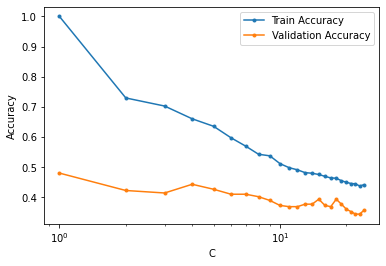

In [ ]:
plt.figure()
plt.plot(range(1,k_max), train_accuracy,label="Train Accuracy",marker='.')
plt.plot(range(1,k_max), validation_accuracy,label="Validation Accuracy",marker='.')
plt.xscale('log')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [ ]:
# fit the model with optimum K:

knn_optimum = KNeighborsClassifier(n_neighbors=1)
knn_optimum.fit(X_train, y_train)
y_pred = knn_optimum.predict(X_test)

print("KNN Classifier score: ", accuracy_score(y_test, y_pred)*100)


KNN Classifier score:  50.37037037037037


# KNN with scaled features

In [ ]:
X_train_scaled = np.loadtxt("Data_files/x_train_scaled.csv",delimiter=',')
y_train_scaled = np.loadtxt("Data_files/y_train_scaled.csv",delimiter=',', dtype=str)
X_val_scaled = np.loadtxt("Data_files/x_val_scaled.csv",delimiter=',')
y_val_scaled = np.loadtxt("Data_files/y_val_scaled.csv",delimiter=',', dtype=str)
X_test_scaled = np.loadtxt("Data_files/x_test_scaled.csv",delimiter=',')
y_test_scaled = np.loadtxt("Data_files/y_test_scaled.csv",delimiter=',', dtype=str)

In [ ]:
k_max=25
train_accuracy,validation_accuracy = find_optimum_k(X_train,y_train,X_val,y_val,k_max)

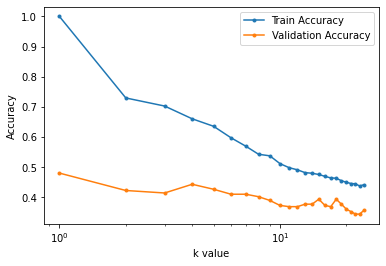

In [ ]:
plt.figure()
plt.plot(range(1,k_max), train_accuracy,label="Train Accuracy",marker='.')
plt.plot(range(1,k_max), validation_accuracy,label="Validation Accuracy",marker='.')
plt.xscale('log')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('EDA_plot/KNN_train_validation.png')
plt.show();

In [ ]:
# fit the model with optimum K:

knn_optimum = KNeighborsClassifier(n_neighbors=1)
knn_optimum.fit(X_train_scaled, y_train_scaled)
y_pred = knn_optimum.predict(X_test_scaled)

print("KNN Classifier score with scaled features: ", accuracy_score(y_test_scaled, y_pred)*100)

KNN Classifier score with scaled features:  55.55555555555556


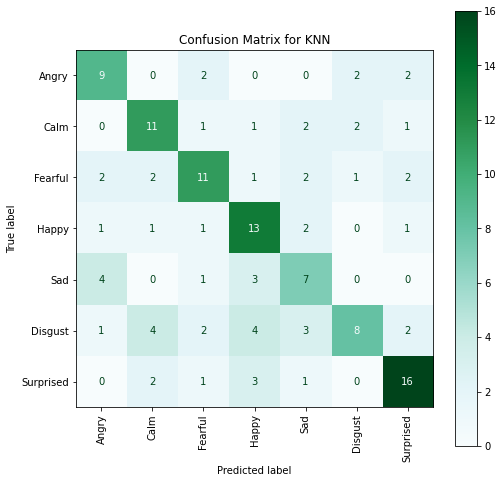

In [ ]:
cm_knn = confusion_matrix(y_test_scaled, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Angry', 'Calm', 'Fearful', 'Happy','Sad','Disgust','Surprised'])
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Confusion Matrix for KNN')
disp_knn.plot(xticks_rotation='vertical', ax=ax, cmap='BuGn')
plt.savefig('EDA_plot/KNN_confusion_matrix.png')
plt.show()


In [ ]:
print(classification_report(y_test_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56        15
           1       0.55      0.61      0.58        18
           2       0.58      0.52      0.55        21
           3       0.52      0.68      0.59        19
           4       0.41      0.47      0.44        15
           5       0.62      0.33      0.43        24
           6       0.67      0.70      0.68        23

    accuracy                           0.56       135
   macro avg       0.55      0.56      0.55       135
weighted avg       0.56      0.56      0.55       135

